# Unsupervised Machine Learning with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>


# Objectives

* Learn what is unsupervised machine learning

* Group data with clustering

* Find underlying linear patterns with PCA

![scikit-learn cheat sheet](http://amueller.github.io/sklearn_tutorial/cheat_sheet.png)

## Clustering

A series of techniques for finding clusters within datasets.

Clusters are groups of points that are closer to each other than to the rest.

<img src="figs/clustering.png" alt="Clustering" style="height: 600px; float: left;"/>


# Generate random data

We're going to generate random data normally distributed around three centers, with noise. Each cluster will have 200 points. We concatenate all three groups in a single dataframe. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

npoints = 200

# To force same data for all students
np.random.seed(7)

centroids = np.random.randn(3,2)
centroids

array([[ 1.6905257 , -0.46593737],
       [ 0.03282016,  0.40751628],
       [-0.78892303,  0.00206557]])

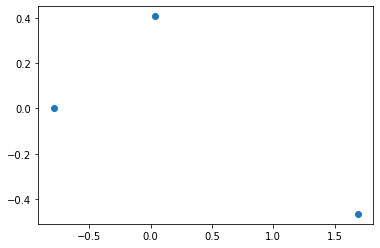

In [3]:
plt.scatter(centroids[:, 0], centroids[:, 1]);

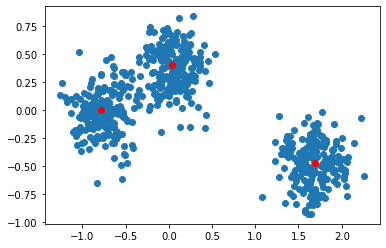

In [4]:
scale = 0.2
first_cluster = centroids[0, :] + np.random.randn(200,2) * scale
second_cluster = centroids[1, :] + np.random.randn(200,2) * scale
third_cluster = centroids[2, :] + np.random.randn(200,2) * scale

all_clusters = np.concatenate((first_cluster, second_cluster, third_cluster))
plt.scatter(all_clusters[:, 0], all_clusters[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], color="red");

# Let's consider this information as customer buy frequency and buy amount

Please, note that the data we have created does not have a class. It is just a set of points. However, we DO know that they come from different distribution and our objective is to find out them.

## K-means clustering

Very simple algorithm, quite fast:

- Throw K candidate cluster centers (_centroids_) randomly at the data.

- Assign points to the closest centroid.

- Update the centroid as the average (center) of its observations.

- Repeat 2,3 until convergence.



```
clustering (data, K):
    Randomly initialize K cluster centroids (mu(1),..., mu(k))
    # or select K random points from data
    Repeat until convergence:
        # assign cluster
        for d in data:
            assign d to closest cluster centroid
        # recompute cluster centroid
        for k = 1 to K:
            mu(k) = mean of data points assigned to cluster k
            
```

#### Exercise

For 3 random starting points, calculate which is the closest for each of our points.

In [5]:
def plot(data, centroids, **kargs):
    plt.scatter(data[:, 0], data[:, 1], **kargs )
    plt.scatter(centroids[:, 0], centroids[:, 1], color="red");

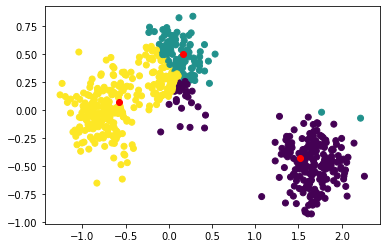

In [6]:
# Let's try a first iteration
from scipy.spatial.distance import cdist

n_cluster = 3
cluster_centroids = np.random.randn(n_cluster, 2)
cluster_assignment = np.argmin(cdist(all_clusters, cluster_centroids), axis=1)

for cluster in range(n_cluster):
    cluster_centroids[cluster, :] = np.mean(all_clusters[cluster_assignment == cluster], axis = 0)

plot(all_clusters, cluster_centroids, c = cluster_assignment)

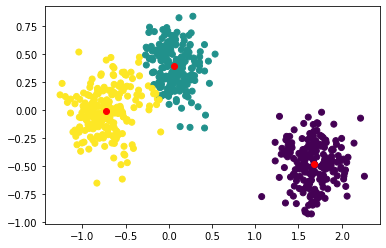

In [7]:
# After N iterations
cluster_assignment = np.argmin(cdist(all_clusters, cluster_centroids), axis=1)
for cluster in range(n_cluster):
    cluster_centroids[cluster, :] = np.mean(all_clusters[cluster_assignment == cluster], axis = 0)

plot(all_clusters, cluster_centroids, c = cluster_assignment)

Now we are going to compare the original 'cluster' where each point comes from, with the asigned cluster. In order to do that, we just create a vector with the original class (color) and use that to plot. 

Please, recall that this is something we can do here because we're creating a synthetic dataset, but normally we won't be able to do it, since we don't know how the data has been generated.

Notice that class labels (kmeans) may not agree with original class number.

Now let's take some time to play with different number of (original) distributions and clusters and see the effect when number of clusters does not match true data

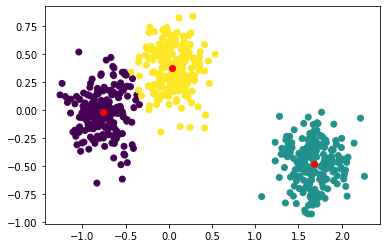

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

clusters = kmeans.fit_predict(all_clusters)
plot(all_clusters, kmeans.cluster_centers_, c = clusters)

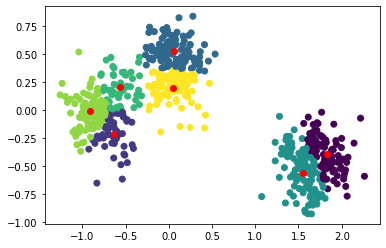

In [9]:
kmeans = KMeans(7)

clusters = kmeans.fit_predict(all_clusters)
plot(all_clusters, kmeans.cluster_centers_, c = clusters)

### Practical: K-Means Clustering with sklearn

Download `players_20.csv` from [here](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset?select=players_20.csv).

In [10]:
df = pd.read_csv('players_20.csv')
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


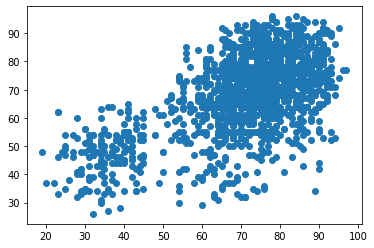

In [11]:
good_players = df[df['overall'] > 75]
plt.scatter(good_players['power_stamina'], good_players['movement_sprint_speed']);

In [12]:
kmeans = KMeans(5)

clusters = kmeans.fit_predict(good_players[['power_stamina', 'movement_sprint_speed']])
kmeans.cluster_centers_

array([[67.83451537, 71.78486998],
       [68.51162791, 51.44186047],
       [79.91981132, 83.84433962],
       [82.31880109, 68.02997275],
       [36.59139785, 47.16666667]])

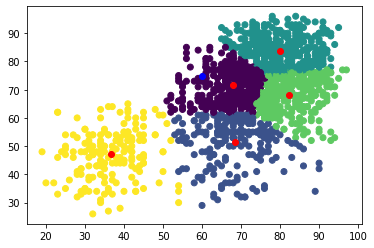

In [13]:
plot(good_players[['power_stamina', 'movement_sprint_speed']].values, kmeans.cluster_centers_, c = clusters);
plt.scatter([60],[75], color="blue")

In [14]:
kmeans.predict([[60, 75]])
# Our input belongs to cluster 0

array([0], dtype=int32)

## The elbow method

To choose a number of clusters in KMeans

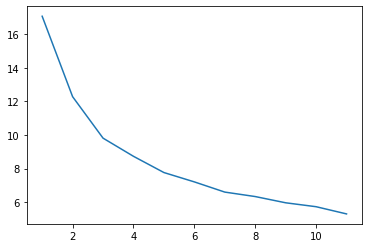

In [25]:
data = good_players[['power_stamina', 'movement_sprint_speed']].values
max_clusters = 12
clustering = []
scores = []
for n_clusters in range(1, max_clusters):
    kmeans = KMeans(n_clusters)
    clusters = kmeans.fit_predict(data)
    distances = cdist(data, kmeans.cluster_centers_)
    score = np.mean(np.min(distances, axis = 1))
    scores.append(score)
    clustering.append(clusters)

plt.plot(range(1, max_clusters), scores);
# number of clusters where cluster score (average of min distance to cluster_centers) does not improve is 6 or 7

## Hierarchical clustering

Instead of subdividing the observations, we join those that are similar to each other.

We can track the order in which we join them up and represent it as a _dendrogram_.

We don't need to specify the number of clusters beforehand.

<img src="https://i0.wp.com/datascienceplus.com/wp-content/uploads/2016/01/hclust.png" alt="Dendrogram" style="height: 600px; float: left;"/>


In [16]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
results = cluster.fit_predict(data)

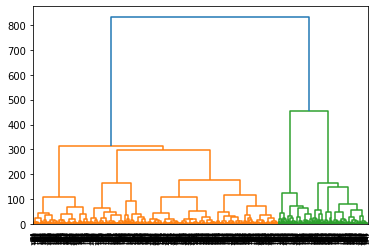

In [17]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(cluster)

In [18]:
# Distance between two elements is the height of the common parent
# Elements under a horizontal bar with low score will correspond to closest elements

### Distance measures in clustering

In any of these approaches, we need a measure of distance or similarity between points. 

In hierarchical clustering, we additionally need a measure of similarity between single points and groups of points.

How will this measures be influenced by the scale of our variables?

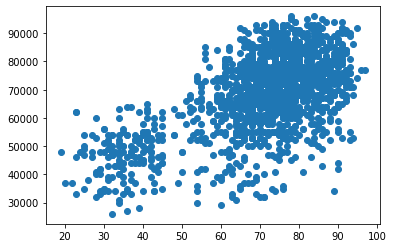

In [19]:
X_1 = good_players['power_stamina']
X_2 = good_players['movement_sprint_speed'] * 1000
# We radically scale up one of the characteristics to see how it affects on cluster distance 
plt.scatter(X_1, X_2);

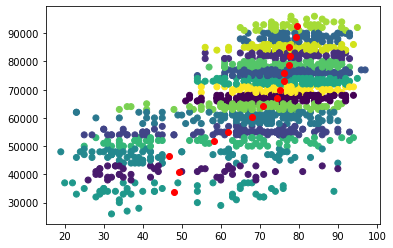

In [20]:
X = pd.concat([X_1, X_2], axis=1)

kmeans = KMeans(16)
kmeans.fit(X)

clusters = kmeans.predict(X)
plot(X.values, kmeans.cluster_centers_, c=clusters)

# We can see how data scale can impact cluster formation. One of the characteristics 
# We must scale

### Clustering in scikit-learn

![Clustering algorithms in scikit-learn](http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_0011.png)

## DBSCAN

There's also a hierarchical version.



15


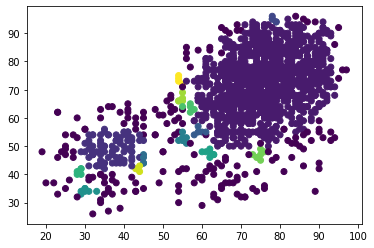

In [22]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2)
clusters = dbscan.fit_predict(data)

print(len(set(dbscan.labels_)))

plt.scatter(good_players['power_stamina'], good_players['movement_sprint_speed'], c=clusters);

4


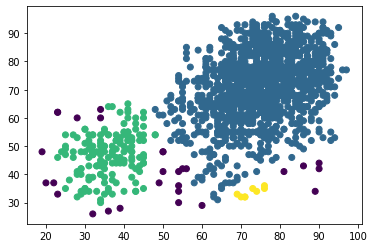

In [24]:
# The higher the eps the higher the number of samples included in your cluster analisys
dbscan = DBSCAN(eps=4)
clusters = dbscan.fit_predict(data)

print(len(set(dbscan.labels_)))

plt.scatter(good_players['power_stamina'], good_players['movement_sprint_speed'], c=clusters);

## Measuring quality of clustering

### Elbow method

We've already seen it

### Silhouette

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

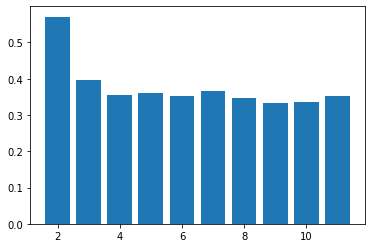

In [30]:
from sklearn.metrics import silhouette_samples, silhouette_score

data = good_players[['power_stamina', 'movement_sprint_speed']].values
max_clusters = 12
clusterings = []

for n_clusters in range(2, max_clusters):
    kmeans = KMeans(n_clusters)
    clusters = kmeans.fit_predict(data)
    clusterings.append(clusters)

scores = []
for clustering in clusterings:
    scores.append(silhouette_score(data, clustering))

plt.bar(range(2, max_clusters), scores);
# Highest score apart from 2 is 7 clusters

## Dimensionality reduction

### Principal Component Analysis (PCA)

A dimensionality reduction technique

![PCA as base change](https://intoli.com/blog/pca-and-svd/img/basic-pca.png)

* Now let's apply PCA to our dataset.


In [32]:
good_players

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,245326,https://sofifa.com/player/245326/mauro-agustin...,M. Fagundez,Mauro Agustín Fagundez,35,1984-02-29,176,76,Uruguay,Uruguay,...,69+2,74+2,74+2,74+2,69+2,70+2,73+2,73+2,73+2,70+2
1611,245327,https://sofifa.com/player/245327/angelo-damian...,A. Vera,Ángelo Damián Vera,31,1988-02-29,180,71,Uruguay,Uruguay,...,53+2,50+2,50+2,50+2,53+2,50+2,46+2,46+2,46+2,50+2
1612,251691,https://sofifa.com/player/251691/alan-zamorado...,A. Zamorado,Alan Zamorado,38,1980-12-17,182,78,Ecuador,Ecuador,...,59+2,59+2,59+2,59+2,59+2,53+2,45+2,45+2,45+2,53+2
1613,251692,https://sofifa.com/player/251692/alexander-agu...,A. Aguilmera,Alexander Aguilmera,33,1985-10-27,194,83,Ecuador,Ecuador,...,64+2,69+2,69+2,69+2,64+2,66+2,75+2,75+2,75+2,66+2


In [35]:
pd.options.display.max_columns = None
good_players.select_dtypes('number')
# variables like height_cm or weight_kg have a low variance (++20 cm or +-10kg) when comparing with other such as value_eur or wage_eur.
# Those ones (value_eur or wage_eur) will impact on the clustering being more significant

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1610,245326,35,176,76,76,76,0,0,1,2,2,NaN,NaN,NaN,19.0,65.0,53.0,63.0,61.0,72.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,48,45,60,77,53,50,47,44,76,70,58,70,77,79,76,65,81,88,80,62,83,70,36,52,62,80,74,77,68,7,12,10,16,9
1611,245327,31,180,71,76,76,0,0,1,3,3,NaN,NaN,NaN,11.0,76.0,76.0,61.0,73.0,33.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,61,78,77,62,77,76,62,63,55,75,73,78,62,79,56,76,55,61,69,73,57,34,72,65,64,65,31,23,22,8,14,12,16,12
1612,251691,38,182,78,76,76,0,0,2,3,3,NaN,NaN,NaN,17.0,57.0,78.0,81.0,77.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,80,68,41,80,81,74,86,91,79,85,59,55,72,76,72,86,77,74,58,89,38,55,76,80,86,70,40,26,15,6,11,8,6,10
1613,251692,33,194,83,76,76,0,0,2,3,2,NaN,NaN,NaN,6.0,33.0,47.0,54.0,49.0,76.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,54,39,75,64,54,45,42,35,51,60,34,32,32,71,33,70,64,71,89,42,86,71,29,44,57,65,76,78,80,16,6,13,7,13


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric = good_players.select_dtypes('number')
numeric = numeric.fillna(numeric.median())

# Scalers make a first fit phase to learn about metrics mean and variance
scaled_numeric = scaler.fit_transform(numeric)
scaled_numeric

array([[-1.53094739,  1.1129945 , -1.77624716, ..., -0.11499756,
        -0.17045026, -0.45012685],
       [-6.44338986,  1.62692906,  0.70792918, ..., -0.11499756,
        -0.17045026, -0.31278416],
       [-0.35501415, -0.1718419 , -1.04560706, ..., -0.11499756,
        -0.12270882, -0.31278416],
       ...,
       [ 1.82229525,  2.65479818, -0.02271092, ..., -0.47432521,
        -0.55238183, -0.35856505],
       [ 1.82233105,  1.36996178,  1.73082532, ..., -0.2176626 ,
        -0.50464038, -0.22122236],
       [ 1.82254585,  0.85602722, -1.48399112, ..., -0.32032764,
        -0.07496737, -0.45012685]])

#### On supervised models

scaled_train_data = scaler.fit_transform(train_data)
model.fit(scaled_train_data)

scaled_test_data = scaler.fit_transform(test_data) # This step would recalculate the scaler only on the test data and might be different to scaling done on train data to fit the supervised model
scaled_test_data = scaler.transform(test_data) # Apply the transform only

model.predict(scaled_test_data)


In [51]:
from sklearn.decomposition import PCA

pca = PCA()
transformed = pca.fit_transform(scaled_numeric)

In [63]:
# New PC components are orthogonal
np.dot(pca.components_[:, 0], pca.components_[:, 1])

1.0547508369094724e-16

In [66]:
# coeficients for PC1 for each of the transformed variables
list(zip(numeric.columns, pca.components_[:, 0]))

[('sofifa_id', -0.018094943973799127),
 ('age', -0.013253359229582914),
 ('height_cm', -0.02468279279641723),
 ('weight_kg', -0.34792540714426123),
 ('overall', 0.20877453633936444),
 ('potential', -0.02928795687721921),
 ('value_eur', -0.28547694739904417),
 ('wage_eur', -0.017618995821673873),
 ('international_reputation', -0.04531032196604234),
 ('weak_foot', -0.07342647495710487),
 ('skill_moves', -0.08395104369135307),
 ('release_clause_eur', 0.020059852248184344),
 ('team_jersey_number', 0.11168984052087909),
 ('contract_valid_until', 0.009508941404385664),
 ('nation_jersey_number', -0.26784931739931744),
 ('pace', -0.19736753666464393),
 ('shooting', -0.041283022641167226),
 ('passing', -0.0835731840309984),
 ('dribbling', -0.13228550709511538),
 ('defending', -0.19340977457075628),
 ('physic', -0.2594427464064483),
 ('gk_diving', -0.3259674978920598),
 ('gk_handling', 0.13961854849680563),
 ('gk_kicking', -0.47441807673598596),
 ('gk_reflexes', -0.11493928972850462),
 ('gk_spee

In [74]:
# Explained variance represents variance of each PC component. Higher variance means higher dependency on that PC
list(zip(range(len(pca.explained_variance_)), pca.explained_variance_))

[(0, 20.970295484213374),
 (1, 9.33528518099259),
 (2, 5.712057700986725),
 (3, 3.7187018773225766),
 (4, 2.923802283721802),
 (5, 2.471481762165425),
 (6, 1.7820888245875512),
 (7, 1.313479593231081),
 (8, 1.0935847942414627),
 (9, 1.028723866602486),
 (10, 0.9163805590431183),
 (11, 0.8945741422000274),
 (12, 0.7925708044434763),
 (13, 0.711239925550393),
 (14, 0.6401651377905322),
 (15, 0.5560918688774896),
 (16, 0.5111435545999591),
 (17, 0.476618157557055),
 (18, 0.41054612451301997),
 (19, 0.3676497301180175),
 (20, 0.3200120054355444),
 (21, 0.3107705215909807),
 (22, 0.2851735824693536),
 (23, 0.2735337391181117),
 (24, 0.25923172752089746),
 (25, 0.23105060213985712),
 (26, 0.2185788647931403),
 (27, 0.21402824935418333),
 (28, 0.20163169558093721),
 (29, 0.18368426522018477),
 (30, 0.17352911222533002),
 (31, 0.16564790999513734),
 (32, 0.14506135503825526),
 (33, 0.1347876343290892),
 (34, 0.12463322095731741),
 (35, 0.11667753189032319),
 (36, 0.10305274595147577),
 (37, 0.

In [75]:
# Explained variance ratio is pondered from 0 to 1
np.sum(pca.explained_variance_ratio_)

0.9999999999999999

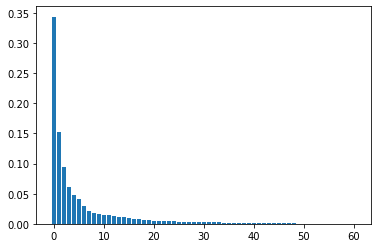

In [73]:
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_);
# To minimize the analysis of the KMeans clustering in all the PC components, we can consider the PC components that sum X%

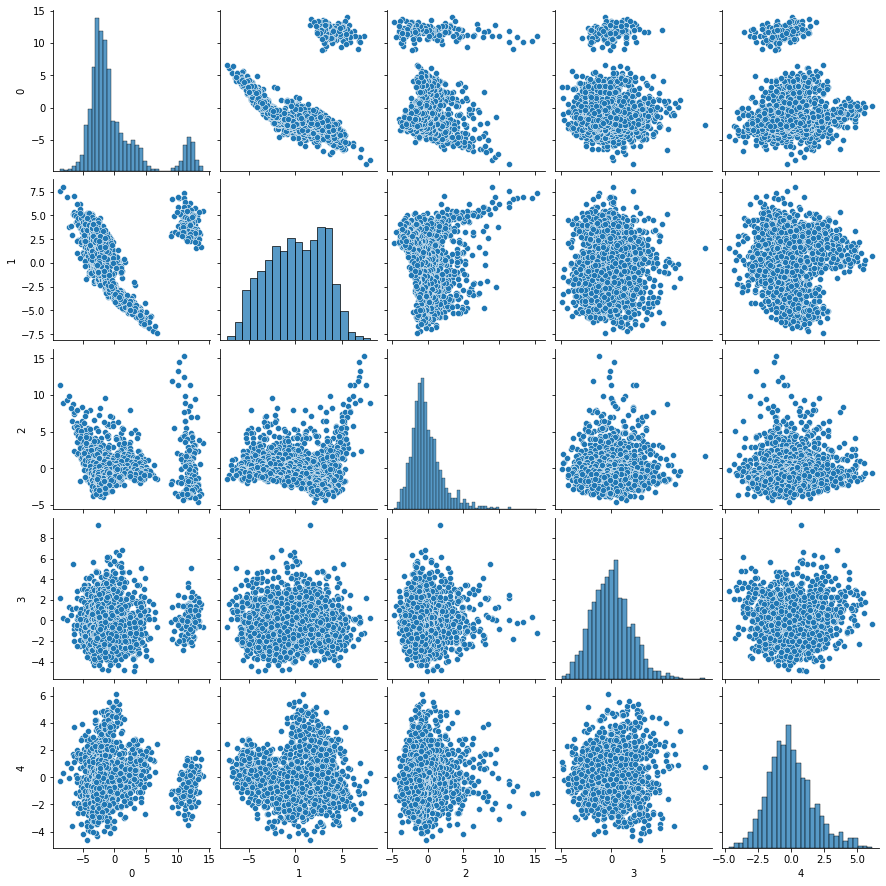

In [58]:
import seaborn as sns

sns.pairplot(pd.DataFrame(transformed[:, :5]));

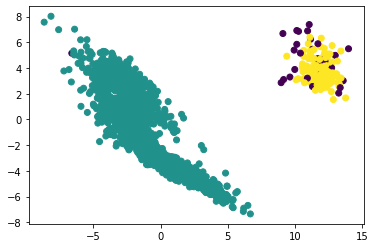

In [90]:
clustering = DBSCAN(eps=7)
clusters = clustering.fit_predict(transformed)

# let'see how is our reality with the new PC components to cluster
plt.scatter(transformed[:, 0], transformed[:, 1], c=clusters);

# Additional References


[An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

[The Elements of Statistical Learning](https://web.stanford.edu/~hastie/ElemStatLearn/)

[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)

[scikit-learn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)

[A comparison of classifiers available in scikit-learn](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

[An amazing explanation of the kernel trick](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html)

[Clustering in scikit-learn](http://scikit-learn.org/stable/modules/clustering.html)

[Ensemble methods in scikit-learn](http://scikit-learn.org/stable/modules/ensemble.html)

[An example of customer segmentation](https://www.kaggle.com/fabiendaniel/customer-segmentation)

[Hands-on ML](https://github.com/ageron/handson-ml2)

[Silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)